In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.403031,-0.603939,0.445445,1.899698,1.835400,0
1,-1.724696,0.597971,3.509942,-2.314219,-0.726157,1
2,-2.195132,1.837289,2.745455,-1.613533,1.537869,1
3,0.217462,1.349509,2.488726,-1.290348,-0.474518,1
4,2.267498,4.183401,-2.683219,1.654236,0.873224,0


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [8]:
# function for feature sampling
import random
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [9]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [10]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\Vedant\AppData\Local\Temp\ipykernel_10256\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [11]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\Vedant\AppData\Local\Temp\ipykernel_10256\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [12]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\Vedant\AppData\Local\Temp\ipykernel_10256\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [13]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col2', 'target'], dtype='object')
Index(['col5', 'col2', 'target'], dtype='object')
Index(['col3', 'col1', 'target'], dtype='object')


In [14]:
df3

,col3,col1,target
98,-1.464487,-1.161843,1
53,-1.370676,0.687404,0
64,-0.225937,0.060802,0
91,-1.012972,3.587298,0
27,-1.772281,0.851494,0
66,-1.730497,1.170729,0
15,-0.319153,-1.686194,1
25,-1.579086,0.364868,0
48,0.834848,0.682200,1
13,1.112465,-0.097689,1


In [15]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [16]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [17]:
from sklearn.tree import plot_tree

[Text(0.296875, 0.9375, 'x[1] <= 0.12\ngini = 0.487\nsamples = 50\nvalue = [29, 21]'),
 Text(0.125, 0.8125, 'x[1] <= -1.697\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.0625, 0.6875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1875, 0.6875, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.46875, 0.8125, 'x[1] <= 2.169\ngini = 0.5\nsamples = 39\nvalue = [19, 20]'),
 Text(0.3125, 0.6875, 'x[0] <= 0.912\ngini = 0.466\nsamples = 27\nvalue = [10, 17]'),
 Text(0.1875, 0.5625, 'x[1] <= 0.444\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.125, 0.4375, 'x[1] <= 0.254\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.0625, 0.3125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.1875, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.4375, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.4375, 0.5625, 'x[0] <= 1.967\ngini = 0.492\nsamples = 16\nvalue = [9, 7]'),
 Text(0.375, 0.4375, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.5, 

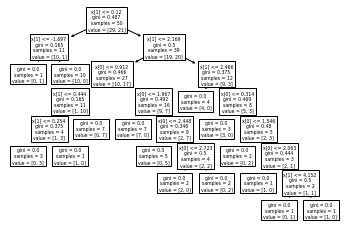

In [18]:
plot_tree(clf1)

[Text(0.625, 0.95, 'x[0] <= 1.869\ngini = 0.487\nsamples = 50\nvalue = [21, 29]'),
 Text(0.4166666666666667, 0.85, 'x[0] <= -0.241\ngini = 0.499\nsamples = 38\nvalue = [20, 18]'),
 Text(0.25, 0.75, 'x[1] <= 2.151\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.16666666666666666, 0.65, 'x[1] <= 0.787\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.08333333333333333, 0.55, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.25, 0.55, 'x[1] <= 1.039\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5833333333333334, 0.75, 'x[0] <= 0.58\ngini = 0.444\nsamples = 27\nvalue = [18, 9]'),
 Text(0.5, 0.65, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.6666666666666666, 0.65, 'x[0] <= 1.58\ngini = 0.5\nsamples = 18\nvalue = [9, 9]'),
 Text(0.5833333

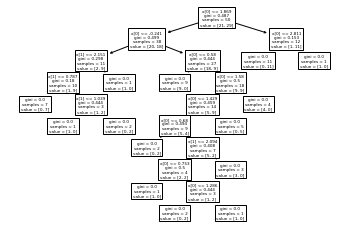

In [19]:
plot_tree(clf2)

[Text(0.5, 0.8333333333333334, 'x[0] <= -0.213\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.25, 0.5, 'x[1] <= -0.707\ngini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.75, 0.5, 'x[1] <= 1.339\ngini = 0.08\nsamples = 24\nvalue = [1, 23]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

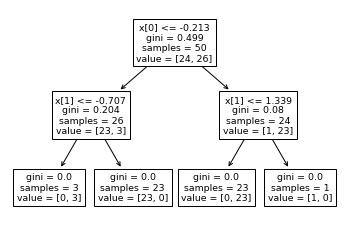

In [20]:
plot_tree(clf3)

In [21]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Python 3.10\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [22]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Python 3.10\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [23]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Python 3.10\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [24]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
46,2.278238,3.856564,2.311210,-1.210575,0.659755,1
34,-0.458336,1.997350,-1.692393,-0.547606,3.279607,1
3,0.217462,1.349509,2.488726,-1.290348,-0.474518,1
51,2.136089,0.665805,-1.421142,0.439025,0.559744,0
54,-0.502764,0.452189,-2.579649,-0.426339,2.820664,0
60,2.488555,5.134324,-1.565188,4.529039,0.300868,0
61,1.395582,0.295536,-0.725219,1.345895,-0.188188,0
40,-1.044787,1.917943,0.251525,-1.477151,2.211461,1
99,-3.155212,0.122498,5.302015,-2.953248,-1.354142,1
61,1.395582,0.295536,-0.725219,1.345895,-0.188188,0
